#### Name: Pranav Nair
#### Course: DSCI_633
#### Assignment 03

## STEP 1: Set Up

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
PROJECT_ROOT_DIR = "."
ASSIGNMENT_ID = "Assignment_03"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, ASSIGNMENT_ID, "images")

if not os.path.isdir(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)
    
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## STEP 2: Load the data

In [3]:
def load_data(dataset_path):
    return pd.read_csv(dataset_path)

train_dataset_path = os.path.join(PROJECT_ROOT_DIR, ASSIGNMENT_ID, "titanic", "train.csv")
test_dataset_path = os.path.join(PROJECT_ROOT_DIR, ASSIGNMENT_ID, "titanic", "test.csv")

In [4]:
df = load_data(train_dataset_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## STEP 3: Data Manipulation and Analysis Using Pandas

Here the column `Survived` is the target and the remaining columns are the features. Let us make the target as the final column

In [5]:
def change_column_list(dataframe, column_name, new_index):
    column_names = list(dataframe.columns)
    old_index = column_names.index(column_name)
    column_names.pop(old_index)
    column_names.insert(new_index, column_name)
    
#     column_names[new_index] = column_name
    return dataframe[column_names]

df = change_column_list(df, "Survived", len(df.columns))

In [6]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
df.shape

(891, 12)

There are 891 rows and 12 columns in the data

In [8]:
#Let's check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The Age and Cabin columns have majority of the null values

In [9]:
# Checking the statistics of the data
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


## Step 4: Discover and visualize the data to gain insights

In [10]:
#Let's check the number of Passenger classes
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

So there were 3 classes - First Class, Second class and third class

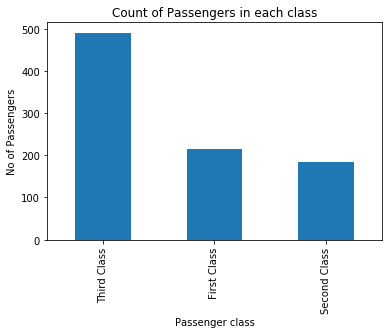

In [11]:
# Let's check the number of passengers in each class
pclass_Bar_plot = df["Pclass"].value_counts().plot.bar();
pclass_Bar_plot.set_ylabel("No of Passengers")
pclass_Bar_plot.set_xlabel("Passenger class")
pclass_Bar_plot.set_xticklabels(("Third Class", "First Class", "Second Class"))
pclass_Bar_plot.set_title("Count of Passengers in each class");

It can be seen that there were close to 500 passengers in Third Class and a little over and below 200 in First and Second class respectively.

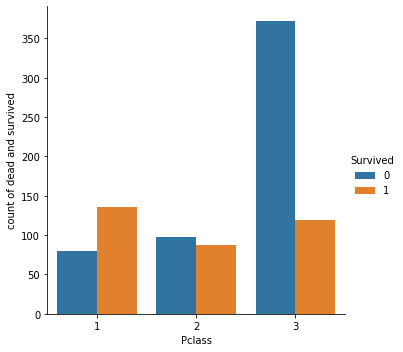

In [12]:
#Let's check, how many of the passengers from each of these three classes survived 
c = pd.DataFrame(df.groupby(["Pclass", "Survived"])["Survived"].count().unstack().unstack().reset_index())
c.rename(columns={0:"count of dead and survived"}, inplace=True)
sns.factorplot("Pclass", "count of dead and survived", hue="Survived", data=c, kind="bar");

- We can see that out of the passengers who survived, around 140 were from First Class, around 120 were from Third Class and around 90 were from the Third Class. 
- It can be seen that maximum passengers who did not survive were from the Third Class. The number count goes over 350
- So if a passenger was from the Third Class, chances are very high that he did not survive.
- For a passenger from the Second Class, the odds of survival/death rate are almost 50% since the count for passengers in Second Class who survived and did not survive is almost the same.
- Also, we can say that for First Class, the survival rate is around 60% and the non-survival rate is around 40%. So, chances of survival for a First class passenger are higher.

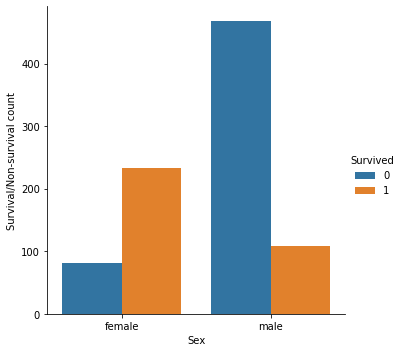

In [13]:
# now let's check the nmber of males and females from those who survived.
maf = pd.DataFrame(df.groupby(["Sex", "Survived"])["Survived"].count().unstack().unstack().reset_index())
maf.rename(columns={0:"Survival/Non-survival count"}, inplace=True)
sns.factorplot("Sex", "Survival/Non-survival count", hue="Survived", data=maf, kind="bar");

- From the above graph, we can say that the count of the non-survived males is ~480 and for males who survived is ~100. So the
survival and non-survival rate is around 20% and 80% respectively. That means, males have a high probability of non-survival.
- But for females, the survival rate seems quite high i.e. to be around 75% and the non-survival rate seems to be around 25%. 

In [14]:
# Let's see from which class were the males and females.
mafc = pd.DataFrame(df.groupby(["Pclass", "Sex", "Survived"])["Survived"].agg("count"))
mafc.rename(columns={"Survived":"Survival/Non-Survival Count"}, inplace=True)
mafc

Survival/Non-Survival Count
Pclass Sex    Survived                             
1      female 0                                   3
              1                                  91
       male   0                                  77
              1                                  45
2      female 0                                   6
              1                                  70
       male   0                                  91
              1                                  17
3      female 0                                  72
              1                                  72
       male   0                                 300
              1                                  47

- In the above table:
    - 1, 2 and 3 in Pclass represent First Class, Second Class and Third Class respectively. 
    - 0, 1 in Survived represent Dead and Survived respectively.
#### Females    
    - It can be seen that there were 94 females in total in 1st Class and from these 91 survived. 
    - There were 76 females in 2nd class and from these 70 survived.
    - There were 144 females in 3rd class and out of them exactly 50% ie 7 survived.
    - So if a person was a female in 1st class or 2nd class, chances of her survival would have been almost certain.
#### Males
    - The count of the no of males who did not survive increases non-linearly as we go from 1st class to 3rd class and the survival rate decreases. 
    - If the passenger is a male and he belongs to 2nd or 3rd class, his rate of survival seems very low.

Max Age of Passengers:  80.0
Min Age of Passengers:  0.42
Mean Age of Passengers:  29.699


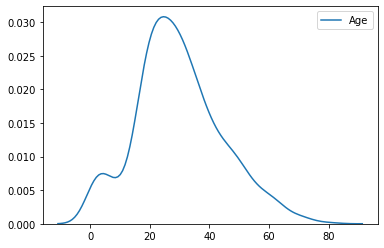

In [15]:
# Let's inspect the Age feature now.
print("Max Age of Passengers: ",max(df["Age"]))
print("Min Age of Passengers: ",min(df["Age"]))
print("Mean Age of Passengers: ",round(df['Age'].mean(), 3))
sns.kdeplot(df['Age']);

- We can see that the maximum age is 80 years and minimum age is 0.42 years which is 5 months.
- The graph for the Age is not a perfectly normal distribution and has a little skewness to the right.
- Hence it is better to plot a boxplot for the Age variable

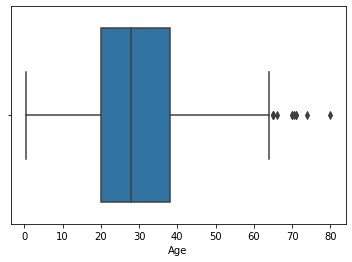

In [16]:
sns.boxplot(df["Age"])

We can see that majority of the People are between 20 and 40 years of Age and the people whose ages are greater than ~63 are considered as outliers

In [17]:
#Lets check if people with the outlier ages survived.
outlier_ages = df[df["Age"]>63.0]
outlier_ages["Survived"].value_counts()

0    12
1     1
Name: Survived, dtype: int64

In [18]:
outlier_ages[outlier_ages["Survived"]==1][["Pclass", "Sex"]]

,Pclass,Sex
630,1,male


Only 1 person from the outlier age group survived out of 13 and he was a male from 1st class.

#### Transformation 1

Age is continuous variable. We can convert it into a categorical variable by binning the values into three categories.
- Children (0-17 yrs)
- Adults (18-60)
- Senior (>60)
This way it will be better to analyse the data more clearly

In [19]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
def convertAge(x):
    if x>=0 and x<=17:
        return "Children";
    elif x>=18 and x<60:
        return "Adult";
    elif x>=60:
        return "Senior Citizen";
    
    
df["Age_Category"] = df["Age"].apply(convertAge)
df.head()

df = change_column_list(df, "Age_Category", 5)
df.head()

,PassengerId,Pclass,Name,Sex,Age,Age_Category,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,Adult,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Adult,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Adult,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,Adult,0,0,373450,8.0500,NaN,S,0


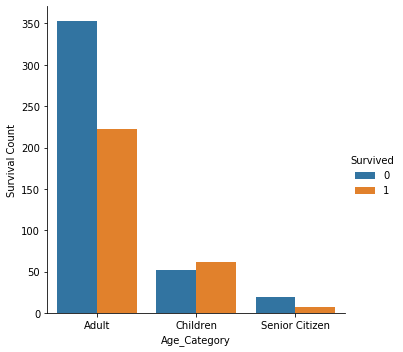

In [21]:
#Let's check, how many of the passengers from each of the three newly created age categories survived 
age = pd.DataFrame(df.groupby(["Age_Category", "Survived"])["Survived"].count().unstack().unstack().reset_index())
age.rename(columns={0:"Survival Count"}, inplace=True)
sns.factorplot("Age_Category", "Survival Count", hue="Survived", data=age, kind="bar");

We can see that:
- The non-survival count for adult age group ie. 18-60 is quite high due to the high death count of a number of males in that age group as we have seen before. 
- The count for Children i.e age group 0-17 seems to be higher. That means children had a high rate of survival amongst all the 
passengers. 

In [22]:
# Let's also check which Pclass were the children who couldn't survive.
df[(df["Age_Category"]=="Children") & (df["Survived"]==0)]["Pclass"].value_counts()

3    49
2     2
1     1
Name: Pclass, dtype: int64

In [23]:
# Let's check the SibSp feature now 
print(df["SibSp"].value_counts())


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [24]:
# and the Parch column
df["Parch"].value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### Transformation 2

In [25]:
# The SibSp and Parch columns represent whether the passenger had family memnbers accompanying them. 
# Let's add both columns into one called Family members.
df["Family_members"] = df['SibSp'] + df["Parch"]

In [26]:
df = change_column_list(df, "Family_members", 8)

In [27]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,Age_Category,SibSp,Parch,Family_members,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,Adult,1,0,1,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Adult,1,0,1,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,Adult,0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Adult,1,0,1,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,Adult,0,0,0,373450,8.0500,NaN,S,0


In [28]:
df["Family_members"].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_members, dtype: int64

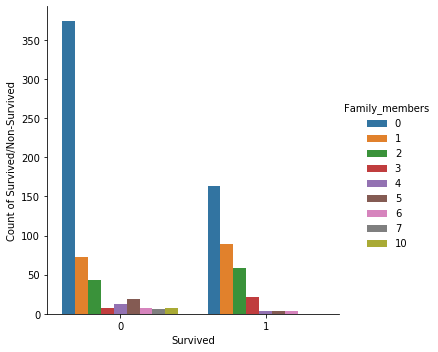

In [29]:
ff = pd.DataFrame(df.groupby(["Survived", "Family_members"])["Family_members"].agg("count").unstack().unstack().reset_index())
sns.factorplot("Survived", 0, hue="Family_members", data=ff, kind="bar");
plt.ylabel("Count of Survived/Non-Survived");

- It can be seen that majortiy of the people who did not survive did not have any friends or family.
- Also it can be seen that the non-survival rate for passengers having 4 and 5 members as friends or family, is higher than their survival rate.

In [30]:
# Let's check these passengers
fofi = df[(df["Family_members"]==4) | (df["Family_members"]==5)]
fofi[fofi["Survived"]==1]

,PassengerId,Pclass,Name,Sex,Age,Age_Category,SibSp,Parch,Family_members,Ticket,Fare,Cabin,Embarked,Survived
88,89,1,"Fortune, Miss. Mabel Helen",female,23.0,Adult,3,2,5,19950,263.000,C23 C25 C27,S,1
311,312,1,"Ryerson, Miss. Emily Borie",female,18.0,Adult,2,2,4,PC 17608,262.375,B57 B59 B63 B66,C,1
341,342,1,"Fortune, Miss. Alice Elizabeth",female,24.0,Adult,3,2,5,19950,263.000,C23 C25 C27,S,1
437,438,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,Adult,2,3,5,29106,18.750,NaN,S,1
742,743,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,Adult,2,2,4,PC 17608,262.375,B57 B59 B63 B66,C,1
774,775,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,Adult,1,3,4,29105,23.000,NaN,S,1


It can be seen that all those who survived were females from 1st and 2nd class

In [31]:
fofi[(fofi["Pclass"]==1) | (fofi["Pclass"]==2)]

,PassengerId,Pclass,Name,Sex,Age,Age_Category,SibSp,Parch,Family_members,Ticket,Fare,Cabin,Embarked,Survived
27,28,1,"Fortune, Mr. Charles Alexander",male,19.0,Adult,3,2,5,19950,263.000,C23 C25 C27,S,0
88,89,1,"Fortune, Miss. Mabel Helen",female,23.0,Adult,3,2,5,19950,263.000,C23 C25 C27,S,1
311,312,1,"Ryerson, Miss. Emily Borie",female,18.0,Adult,2,2,4,PC 17608,262.375,B57 B59 B63 B66,C,1
341,342,1,"Fortune, Miss. Alice Elizabeth",female,24.0,Adult,3,2,5,19950,263.000,C23 C25 C27,S,1
437,438,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,Adult,2,3,5,29106,18.750,NaN,S,1
438,439,1,"Fortune, Mr. Mark",male,64.0,Senior Citizen,1,4,5,19950,263.000,C23 C25 C27,S,0
742,743,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,Adult,2,2,4,PC 17608,262.375,B57 B59 B63 B66,C,1
774,775,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,Adult,1,3,4,29105,23.000,NaN,S,1


And it can also be said that the first class males made way for women first so that they could survive

In [32]:
# Let's check the ticket column
df["Ticket"].nunique()

681

Ticket is a categorical column with 681 categories. It makes sense to drop this column because it does not seem to provide much infromation.

Minimum Fare:  0.0
Maximum Fare:  512.3292


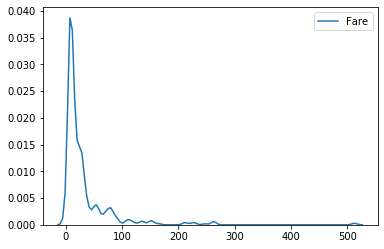

In [33]:
#Let's check the Fare column
print("Minimum Fare: ",df["Fare"].min())
print("Maximum Fare: ", df["Fare"].max())
sns.kdeplot(df["Fare"]);

- The fare column is heavily skewed to the right. Which is expected because majority of the passengers were from the 3rd class and third class fares should be typically low and towards the right would have been the ticket fares of 2nd and 1st class passengers.
- We will have to transform the Fare column using a scaling method

## Step 5: Prepare the data for Machine Learning Algorithms

#### Transfromation 3

In [34]:
#Lets make the PassengerID column the index
df.set_index("PassengerId", inplace=True)

#### Transformation 4

In [35]:
#Let's drop the unnecessary columns - Name, Ticket, Cabin
df = df.drop(["Name", "Ticket", "Cabin"], axis=1)
df.head()

,Pclass,Sex,Age,Age_Category,SibSp,Parch,Family_members,Fare,Embarked,Survived
PassengerId,,,,,,,,,,
1,3,male,22.0,Adult,1,0,1,7.2500,S,0
2,1,female,38.0,Adult,1,0,1,71.2833,C,1
3,3,female,26.0,Adult,0,0,0,7.9250,S,1
4,1,female,35.0,Adult,1,0,1,53.1000,S,1
5,3,male,35.0,Adult,0,0,0,8.0500,S,0


#### Transformation 5

In [36]:
# Let's drop the columns Age, SibSp and Parch which we have already converted
df = df.drop(["Age", "SibSp", "Parch"], axis=1)
df.head()

,Pclass,Sex,Age_Category,Family_members,Fare,Embarked,Survived
PassengerId,,,,,,,
1,3,male,Adult,1,7.2500,S,0
2,1,female,Adult,1,71.2833,C,1
3,3,female,Adult,0,7.9250,S,1
4,1,female,Adult,1,53.1000,S,1
5,3,male,Adult,0,8.0500,S,0


#### Transformation 6

In [37]:
# The Age_Category has some None values which are basically NaN values from the original continuous column. Let us replace them with
# the most largely occuring value in Age_category ie. Adult
def fillAge(x):
    if x==None:
        return "Adult"
    else:
        return x
df["Age_Category"] = df["Age_Category"].apply(fillAge)

df.head()

,Pclass,Sex,Age_Category,Family_members,Fare,Embarked,Survived
PassengerId,,,,,,,
1,3,male,Adult,1,7.2500,S,0
2,1,female,Adult,1,71.2833,C,1
3,3,female,Adult,0,7.9250,S,1
4,1,female,Adult,1,53.1000,S,1
5,3,male,Adult,0,8.0500,S,0


#### Transformation 7

In [38]:
# Replacing NaN values in Embarked with S - the most repeated value.
df['Embarked'].fillna("S", inplace=True)
df['Embarked'].isnull().sum()

0

#### Transformation 8

In [39]:
# Applying Min-Max Scaling to the Fare variable
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Fare"]] = scaler.fit_transform(df[["Fare"]])

#### Transformation 9

In [40]:
# Applying One-Hot Encoding on the categorical features
df = pd.get_dummies(df)

In [41]:
# Finally our data looks like this
df.head()

,Pclass,Family_members,Fare,Survived,Sex_female,Sex_male,Age_Category_Adult,Age_Category_Children,Age_Category_Senior Citizen,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,3,1,0.014151,0,0,1,1,0,0,0,0,1
2,1,1,0.139136,1,1,0,1,0,0,1,0,0
3,3,0,0.015469,1,1,0,1,0,0,0,0,1
4,1,1,0.103644,1,1,0,1,0,0,0,0,1
5,3,0,0.015713,0,0,1,1,0,0,0,0,1


In [42]:
# Let us define a transfromation function that will apply all the transformations we did on train data to our test data
def transformation(df):
    df["Age_Category"] = df["Age"].apply(convertAge)
    df["Family_members"] = df['SibSp'] + df["Parch"]
    df.set_index("PassengerId", inplace=True)
    df = df.drop(["Name", "Ticket", "Cabin"], axis=1)
    df = df.drop(["Age", "SibSp", "Parch"], axis=1)
    df["Age_Category"] = df["Age_Category"].apply(fillAge)
    df['Embarked'].fillna("S", inplace=True)
    df[["Fare"]] = scaler.fit_transform(df[["Fare"]])
    df = pd.get_dummies(df)
    return df

In [43]:
# Loading the test data
df_test = pd.read_csv(test_dataset_path)

# Checking for Null Values before transforming.
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The Fare column has a null value that will not be replaced while tranformmation. Replacing this with the median value for Fare

In [44]:
df_test["Fare"].fillna(df['Fare'].median(), inplace=True)

In [45]:
df_test = transformation(df_test)

df_test

,Pclass,Fare,Family_members,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Category_Adult,Age_Category_Children,Age_Category_Senior Citizen
PassengerId,,,,,,,,,,,
892,3,0.015282,0,0,1,0,1,0,1,0,0
893,3,0.013663,1,1,0,0,0,1,1,0,0
894,2,0.018909,0,0,1,0,1,0,0,0,1
895,3,0.016908,0,0,1,0,0,1,1,0,0
896,3,0.023984,2,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0.015713,0,0,1,0,0,1,1,0,0
1306,1,0.212559,0,1,0,1,0,0,1,0,0
1307,3,0.014151,0,0,1,0,0,1,1,0,0


In [46]:
# Loading the submission csv
submission = load_data(r"C:\Users\Pranav\Documents\RIT\DSCI-633\RIT-DSCI-633-FDS\Assignments\Assignment_03\titanic\gender_submission.csv")

In [47]:
# Separating features and target
X = df.loc[:, df.columns!="Survived"]
y = df.loc[:, df.columns=="Survived"]

In [48]:
# Splitting the data into training and validation with an 80:20 ratio
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 
                                                   

## Step 6: Select and train a model

In [56]:
# Testing KNN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold

print("KNN model Results: ")

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_val_knn = knn.predict(X_val)
y_pred_test_knn = knn.predict(df_test)
print("On Validation data, the accuracy is: ",accuracy_score(y_val, y_pred_val_knn))
print("On Test data, the accuracy is: ",accuracy_score(submission["Survived"], y_pred_test_knn))

KNN model Results: 
On Validation data, the accuracy is:  0.7932960893854749
On Test data, the accuracy is:  0.80622009569378


In [57]:
# Testing Logistic Regression
from sklearn.linear_model import LogisticRegression

print("Logistic Regression model Results: ")

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_val_lr = lr.predict(X_val)

y_pred_test_lr = lr.predict(df_test)

print("On Validation data, the accuracy is: ",accuracy_score(y_val, y_pred_val_lr))
print("On Test data, the accuracy is: ",accuracy_score(submission["Survived"], y_pred_test_lr))

Logistic Regression model Results: 
On Validation data, the accuracy is:  0.7877094972067039
On Test data, the accuracy is:  0.8875598086124402


In [58]:
from sklearn.svm import SVC

print("Support Vector Machine Classifier results: ")

svc = SVC()
svc.fit(X_train, y_train)

y_pred_val_svc = svc.predict(X_val)

y_pred_test_svc = svc.predict(df_test)

print("On Validation data, the accuracy is: ",accuracy_score(y_val, y_pred_val_svc))
print("On Test data, the accuracy is: ",accuracy_score(submission["Survived"], y_pred_test_svc))

Support Vector Machine Classifier results: 
On Validation data, the accuracy is:  0.8044692737430168
On Test data, the accuracy is:  0.9832535885167464


## Step 7: Fine tune the model 

In [59]:
# Let's fine tune the KNN model

print("KNN Fine-tuned model: ")

p1 = range(1, 10)
p2 = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid_search = GridSearchCV(estimator=knn, param_grid={"n_neighbors":p1,"metric":p2}, n_jobs=-1, cv=StratifiedKFold(n_splits=3, random_state=42), scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

y_pred_val_knn_gs = grid_search.predict(X_val)
y_pred_test_knn_gs = grid_search.predict(df_test)

print("On Validation data, the accuracy is: ",accuracy_score(y_val, y_pred_val_knn_gs))
print("On Test data, the accuracy is: ",accuracy_score(submission["Survived"], y_pred_test_knn_gs))

KNN Fine-tuned model: 
On Validation data, the accuracy is:  0.8156424581005587
On Test data, the accuracy is:  0.9952153110047847


Accuracy of KNN model on test data has increased from 80% to 96% after finetuning the model.

In [60]:
# Let's fine tune the logistic regression model

print("Logistic Regression Fine-tuned model: ")

p1 = ['liblinear', 'newton-cg', 'lbfgs']
p2 = ["l2"]
p3 = [10, 1.0, 0.1, 0.01]
# define grid search
grid_search = GridSearchCV(estimator=lr, param_grid={"solver":p1,"penalty":p2,"C":p3}, n_jobs=-1, cv=StratifiedKFold(n_splits=3, random_state=42), scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

y_pred_val_lr_gs = grid_search.predict(X_val)
y_pred_test_lr_gs = grid_search.predict(df_test)

print("On Validation data, the accuracy is: ",accuracy_score(y_val, y_pred_val_lr_gs))
print("On Test data, the accuracy is: ",accuracy_score(submission["Survived"], y_pred_test_lr_gs))

Logistic Regression Fine-tuned model: 
On Validation data, the accuracy is:  0.7821229050279329
On Test data, the accuracy is:  0.8899521531100478


GridSearchCV doesn't seem to made any difference in the prediction of Logitic regression since the accuracy has remained the same on the test data i.e 88%

In [61]:
# Let's fine tune the SVM model

print("SVM Fine-tuned model: ")

p1 = ['sigmoid', 'poly', 'rbf']
p2 = [10, 1.0, 0.1, 0.01]
# define grid search
grid_search = GridSearchCV(estimator=svc, param_grid={"kernel":p1, "C":p2}, n_jobs=-1, cv=StratifiedKFold(n_splits=3, random_state=42), scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

y_pred_val_svc_gs = grid_search.predict(X_val)
y_pred_test_svc_gs = grid_search.predict(df_test)

print("On Validation data, the accuracy is: ",accuracy_score(y_val, y_pred_val_svc_gs))
print("On Test data, the accuracy is: ",accuracy_score(submission["Survived"], y_pred_test_svc_gs))

SVM Fine-tuned model: 
On Validation data, the accuracy is:  0.8044692737430168
On Test data, the accuracy is:  0.9234449760765551


SVM seems to have performed better without finetuning since the accuracy has dropped from 98% to 92%

## Done